# Bootstrapping:

In [1]:
## load libraries:

library(reshape2)
library(ggplot2)
library(repr)

In [2]:
## Reading the training and testing files in R:

train_data <- read.csv("Task1B_train.csv")
test_data <- read.csv("Task1B_test.csv")

In [3]:
head(train_data)
head(test_data)

,x1,x2,x3,x4,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1991.496,1628.75,1678.1,1772.8,2443.6
2,1991.504,1606.51,1678.6,1718.0,2448.2
3,1991.512,1618.16,1686.6,1723.1,2484.7
4,1991.519,1630.75,1682.9,1734.5,2487.9
5,1991.527,1635.47,1697.5,1754.0,2510.5
6,1991.535,1647.84,1723.8,1759.8,2532.5


,x1,x2,x3,x4,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1991.500,1613.63,1688.5,1750.5,2460.2
2,1991.508,1621.04,1684.1,1708.1,2470.4
3,1991.515,1610.61,1671.6,1714.3,2466.8
4,1991.523,1640.17,1703.6,1757.4,2508.4
5,1991.531,1645.89,1716.3,1754.3,2497.4
6,1991.538,1638.35,1730.5,1755.5,2556.8


In [4]:
## Creating training and testing datasets and labels:

train.data <- train_data[ ,-5]
train.label <- train_data[ ,5]
test.data <- test_data[,-5]
test.label <- test_data[ ,5]

## I. Modify the code in Activity 2 to handle bootstrapping for KNN regression:

In [5]:
## Define a function that generates sample indices based on bootstrap technique:

boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

In [6]:
## KNN Regression:

knn <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    
    ## Count number of train samples:
    
    train.len <- nrow(train.data)
    
    ## Count number of test samples:
    
    test.len <- nrow(test.data)
    
    ## Calculate distances between samples:
    
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## For each test sample:
    
    for (i in 1:test.len){
        
        ## Find its K nearest neighbours from training samples:
        
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]

        train.label <- data.frame(train.label)

        test.label <- data.frame(test.label)
        
        ## Calculate the predicted labels according to the mean of the nearest neighbours:
        
        test.label[i,]<- mean(train.label[nn,])
    }
    
    ## Return the class labels as output:
    
    return (test.label)
}

## II. Application of bootsrapping on KNN Regression:

- In statistics, bootstrapping is any test or metric that relies on random sampling with replacement. 
- Bootstrapping allows assigning measures of accuracy to sample estimates. 
- It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data

In [7]:
# fix the parameters (50,40,50)
K <- 15                                                                    ## Maximum K for KNN 
L <- 50                                                                    ## Number of datasets
N <- 20                                                                    ## Size of each datasets

## Generate bootstrap indices:

boot.indx <- boot(nrow(train.data), N, L)

## A dataframe to track the number of missclassified samples in each case:

miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))


## For every k values:

for (k in 1: K){
    
    ## For every dataset sizes:
    
    for (l in 1:L){
        
        ## Calculate iteration index i:
        
        i <- (k-1)*L+l

        ## Save sample indices that were selected by bootstrap:
        
        indx <- boot.indx[l,]

        
        ## Save the values of k and l:
        
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        ## Calculate and record the test missclassification rates using RMSE:

        test_y_pred <- knn(train.data[indx, ], train.label[indx ], test.data, K=k)
        residuals_test <- test_y_pred - test.label
        test_residual <- residuals_test*residuals_test
        mean_test <- mean(test_residual$test.label, na.rm=TRUE)
        miss[i,'test'] <-  sqrt(mean_test)

    } 
}

In [8]:
miss

K,L,test
<int>,<int>,<dbl>
1,1,293.4163
1,2,242.7713
1,3,165.6123
1,4,143.2545
1,5,179.1406
1,6,189.9143
1,7,150.7677
1,8,224.8357
1,9,153.4615


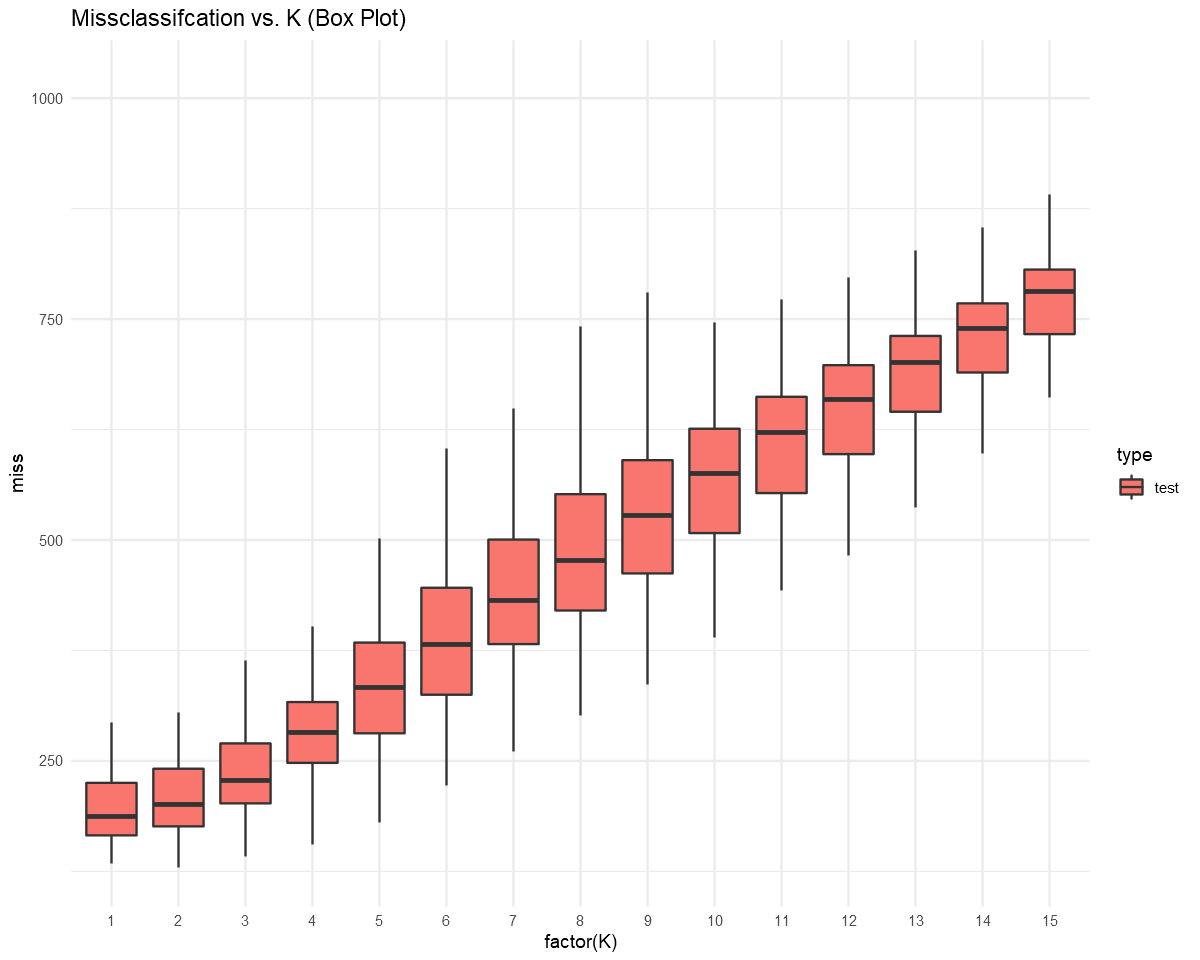

In [9]:
## Plot misclassification percentage for test data sets:

options(repr.plot.width=10, repr.plot.height=8)

miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')  
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. K (Box Plot)') + theme_minimal()

# Ignore the warnings (because of ignoring outliers):

options(warn=-1)

## III. Graph Interpretation:

- Uncertainty characterizes the range of values within which the true value is asserted to lie with some level of confidence.
- Based on the above plot, it can be seen that the **uncertainty** as well as the **test error** keeps on **increasing** as the value of **K increases**.

## IV. Variable size of samples:

In [9]:
for (N in seq(5,75,5)){
    print(N)
}

[1] 5
[1] 10
[1] 15
[1] 20
[1] 25
[1] 30
[1] 35
[1] 40
[1] 45
[1] 50
[1] 55
[1] 60
[1] 65
[1] 70
[1] 75


In [10]:
## 50 times each subset should run:

class <- data.frame('N' = rep(seq(5,75,5),each=50), 'L'=1:L, 'test'=rep(0,50*15))
class

N,L,test
<dbl>,<int>,<dbl>
5,1,0
5,2,0
5,3,0
5,4,0
5,5,0
5,6,0
5,7,0
5,8,0
5,9,0


In [11]:
## Fix the parameters (50,40,50)
K <- 5                                                                          ## Maximum K for KNN 
L <- 50                                                                         ## Number of datasets

## Variable size of samples i.e. variable N:

# A dataframe to track the number of missclassified samples in each case:

miss_class <- data.frame('N' = rep(seq(5,75,5),each=50), 'L'=1:L, 'test'=rep(0,50*15))

for (S in (seq(from=5,to=75,by=5))){
    
    # Generate bootstrap indices:
    
    bootstrap.indx <- boot(nrow(train.data), S, L)
         
    
    ## For every dataset sizes:
    
        for (l in 1:L){
        
        ## Calculate iteration index i:
            
            i <- (S-5)*10+l
        
        ## Save sample indices that were selected by bootstrap:
            
            indx <- bootstrap.indx[l,]
   
        
        ## Save the value of l and S:
            
            miss_class[i,'L'] <- l
            miss_class[i,'N'] <- S
        
        ## Calculate and record the test missclassification rates using RMSE:


            test_y_pred <- knn(train.data[indx, ], train.label[indx ], test.data, K=5)
            residuals_test <- test_y_pred - test.label
            test_residual <- residuals_test*residuals_test
            mean_test <- mean(test_residual$test.label, na.rm=TRUE)
            miss_class[i,'test'] <-  sqrt(mean_test)
    } 
}

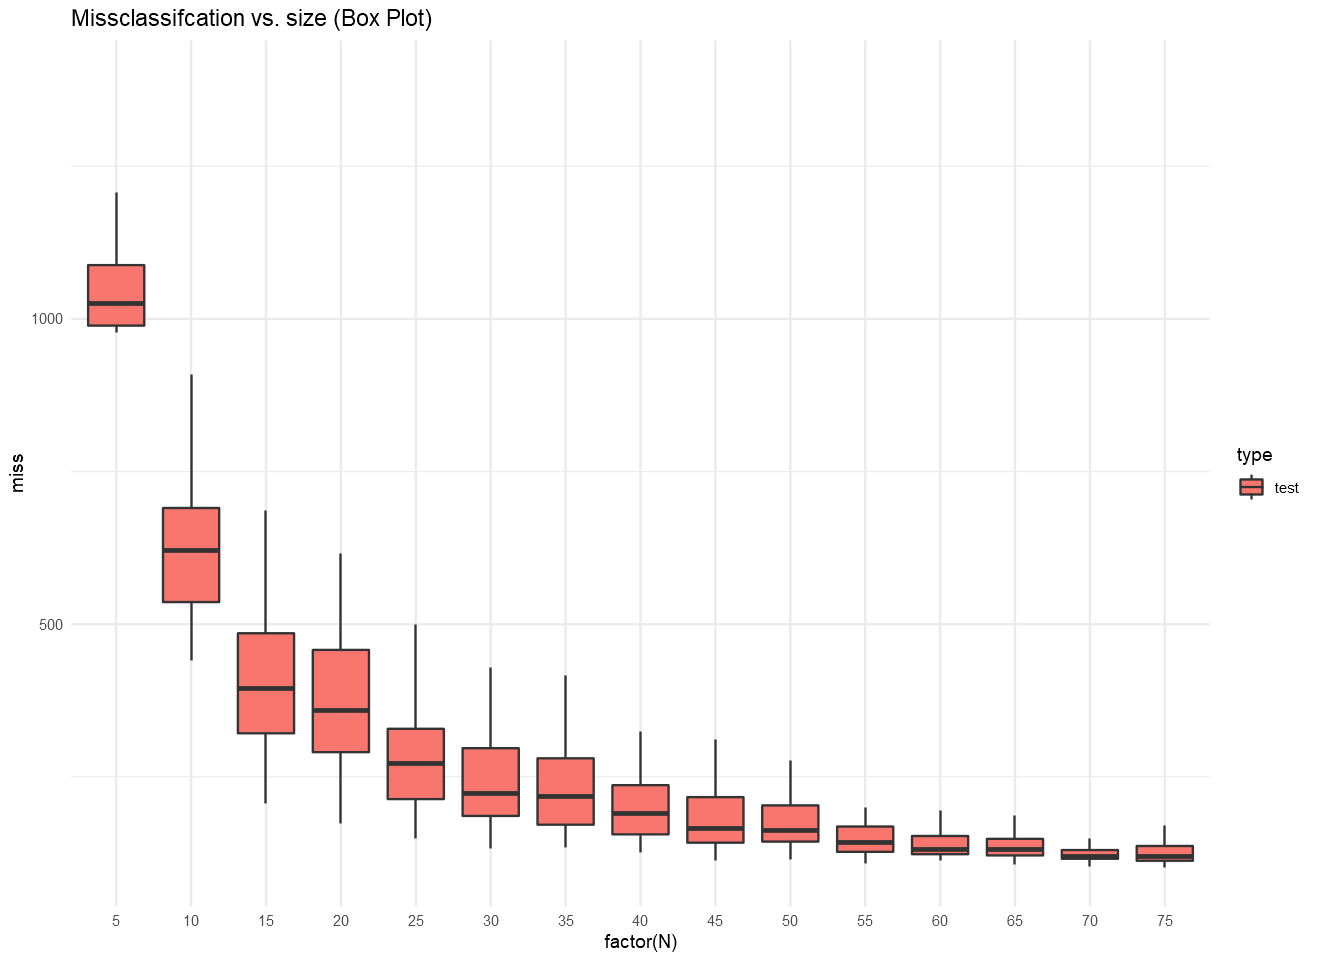

In [12]:
## Plot misclassification percentage for train and test data sets:

miss_class.m <- melt(miss_class, id=c('N', 'L'))                       ## Reshape for visualization
names(miss_class.m) <- c('N', 'L', 'type', 'miss')  

options(repr.plot.width=11, repr.plot.height=8)                        ## Size the plot


ggplot(data=miss_class.m[miss_class.m$type=='test',], aes(factor(N), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. size (Box Plot)') + theme_minimal()

## Ignore the warnings (because of ignoring outliers)
options(warn=-1)

## V: Graph Interpretation:

- The error and uncertainty is the **highest** when the dataset size is <b>5</b> as the **size increases**, the test error and uncertainty keep on **decreasing** and it is the lowest for sizes 65 and 75.
- The model learns more accurately as the size of the dataset increases.